# Project | Machine Learning Models Evaluation

## <font color='DarkBlue'>I. <ins>Loading the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Importing libraries</ins>: <font color='violet'></font>

In [243]:
# ! pip install missingno
import pollyfonctions as po
po.import_models()


In [244]:
import julestools as jt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly import express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.utils import resample

import imblearn
from imblearn.over_sampling import SMOTE

In [245]:
pd.set_option('display.max_columns', None)


### <font color='MediumBlue'>2 - <ins>Dataset source</ins>: <font color='violet'></font>

<ins><strong>Source: </strong></ins>

In [246]:
source = '../data/data.csv'

### <font color='MediumBlue'>3 - <ins>  Loading datasets into DataFrames</ins>: <font color='violet'></font>

In [247]:
df = pd.read_csv(source)

##  <font color='DarkBlue'>II. <ins>Exploring the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Datasets Overview</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Displaying number of rows and number of columns: </font>

In [248]:
print(f"{df.shape[0]} rows, {df.shape[1]} columns")

6819 rows, 96 columns


#### <font color='CornflowerBlue'>b) Glancing at the datasets: </font>

<ins><strong>What the dataset looks like ? </strong></ins>

In [249]:
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.

<ins><strong>What are the data types ? </strong></ins>

In [250]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

## Cleaning Column Names

<strong><em>Stripping, renaming in lower case and replacing spaces with "_" :</strong></em>

In [251]:
def fix_col_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+','_',regex=True)
    return df

fix_col_names(df)

,bankrupt?,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

### <font color='MediumBlue'>2 - <ins> Identifying variables and their specifications</ins>: <font color='violet'></font>

<ins><strong>Displaying number of unique values for each column : </strong></ins>

In [252]:
df.nunique()

bankrupt?                                                     2
roa(c)_before_interest_and_depreciation_before_interest    3333
roa(a)_before_interest_and_%_after_tax                     3151
roa(b)_before_interest_and_depreciation_after_tax          3160
operating_gross_margin                                     3781
                                                           ... 
liability_to_equity                                        6819
degree_of_financial_leverage_(dfl)                         6240
interest_coverage_ratio_(interest_expense_to_ebit)         6240
net_income_flag                                               1
equity_to_liability                                        6819
Length: 96, dtype: int64

<ins><strong>Displaying number of unique values for each column that has less than 10 distinct values : </strong></ins>

In [253]:
df.nunique()[lambda x: x <= 10]

bankrupt?                2
liability-assets_flag    2
net_income_flag          1
dtype: int64

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre-tax_net_interest_rate                                6819 non-null   float64
 8   after-tax_net_interest_rate 

<strong><font color='BlueViolet'>Numerical</font></strong> **variables specifications**:

- **XXX**: <ins><em><font color='DarkMagenta'>Discrete</font></em></ins>.
- **YYY**: <ins><em><font color='DarkMagenta'>Discrete</font></em></ins>.
- **ZZZ**: <ins><em><font color='DarkMagenta'>Continuous</font></em></ins>. (Should be Discrete )
- **WWW**: <ins><em><font color='DarkMagenta'>Continuous</font></em></ins>. (Should be Discrete or categorical )


In [255]:
num_var = ['XXX',
           'YYY',
           'ZZZ'
         ]

<strong><font color='BlueViolet'>Categorical</font></strong> **variables specification**:


- **AAA**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.
- **BBB**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>. 
- **CCC**: <ins><em><font color='DarkMagenta'>Ordinal</font></em></ins>. 
- **DDD**: <ins><em><font color='DarkMagenta'>Ordinal</font></em></ins>.(It's actually a date)

In [256]:
cat_var = ['AAA',
           'BBB',
           'CCC',
           'DDD'
         ]

### <font color='MediumBlue'>3 - <ins> Formatting & Cleaning data</ins>: <font color='violet'></font>

<ins><strong>Dealing with columns with Null values : </strong></ins>

In [257]:
print(*list(df.isna().any()[lambda x: x == True].index),sep="\n")

In [258]:
df.isna().sum()

bankrupt?                                                  0
roa(c)_before_interest_and_depreciation_before_interest    0
roa(a)_before_interest_and_%_after_tax                     0
roa(b)_before_interest_and_depreciation_after_tax          0
operating_gross_margin                                     0
                                                          ..
liability_to_equity                                        0
degree_of_financial_leverage_(dfl)                         0
interest_coverage_ratio_(interest_expense_to_ebit)         0
net_income_flag                                            0
equity_to_liability                                        0
Length: 96, dtype: int64

In [259]:
df.isna().any()[lambda x: x == True].index.tolist()

[]

<ins><strong>Columns to remove : </strong></ins>

In [260]:
col_to_remove = ['net_income_flag']

In [261]:
df = po.drop_col(df, col_to_remove)
print(f"{df.shape[0]} rows, {df.shape[1]} columns")

6819 rows, 95 columns


<ins><strong>Cleaning invalid Values : </strong></ins>

In [262]:
# replacing "A" by "B" in 'xxx'
df['xxx'] = df['xxx'].str.replace('A','B')

KeyError: 'xxx'

<ins><strong>Setting values to upper case: </strong></ins>

In [ ]:
df['xxx'] = df['xxx'].str.upper()

##  <font color='DarkBlue'>III. <ins> EDA Exploratory Data Analysis</ins>: <font color='blue'></font>

### <font color='MediumBlue'>2 - <ins> Analysing correlations</ins>: <font color='violet'></font>

In [ ]:
correlations_matrix = po.corr_matrix(df)

In [ ]:
high_corr_threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlations_matrix.columns)):
    for j in range(i):
        if abs(correlations_matrix.iloc[i, j]) > high_corr_threshold:
            col_pair = (correlations_matrix.columns[i], correlations_matrix.columns[j], correlations_matrix.iloc[i, j])
            highly_correlated_pairs.append(col_pair)


print(f"Number of highly correlated pairs: {len(highly_correlated_pairs)}")


for pair in highly_correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]}")
    

Number of highly correlated pairs: 43
Columns: roa(a)_before_interest_and_%_after_tax and roa(c)_before_interest_and_depreciation_before_interest - Correlation: 0.9401237079700807
Columns: roa(b)_before_interest_and_depreciation_after_tax and roa(c)_before_interest_and_depreciation_before_interest - Correlation: 0.9868494970182541
Columns: roa(b)_before_interest_and_depreciation_after_tax and roa(a)_before_interest_and_%_after_tax - Correlation: 0.9557406252835042
Columns: realized_sales_gross_margin and operating_gross_margin - Correlation: 0.9995182781255221
Columns: pre-tax_net_interest_rate and operating_profit_rate - Correlation: 0.9164477798560053
Columns: after-tax_net_interest_rate and operating_profit_rate - Correlation: 0.8621907071596802
Columns: after-tax_net_interest_rate and pre-tax_net_interest_rate - Correlation: 0.9863790242582028
Columns: continuous_interest_rate_(after_tax) and operating_profit_rate - Correlation: 0.9155437834862158
Columns: continuous_interest_rate_

##  <font color='DarkBlue'>IV. <ins> Reprocessing: Feature Selection</ins> <font color='blue'></font>

### <font color='MediumBlue'>1- <ins> Scaling the data</ins>: <font color='violet'></font>

In [ ]:

df.rename(columns={'bankrupt?': 'bankrupt'}, inplace=True)

df

,bankrupt,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.19000

In [ ]:
df.head()

,score,Column
0,3.380804,roa(c)_before_interest_and_depreciation_before...
1,4.207267,roa(a)_before_interest_and_%_after_tax
2,3.483747,roa(b)_before_interest_and_depreciation_after_tax
3,0.032187,operating_gross_margin
4,0.031737,realized_sales_gross_margin


In [ ]:
y = df["bankrupt"]
columnsx = df.columns[1:]
X = df[columnsx]
X
X.shape


KeyError: 'bankrupt'

### <font color='MediumBlue'>2- <ins> Detecting low variance features</ins>: <font color='violet'></font>

Scaling X


In [263]:

scaler = MinMaxScaler()
X_sca = scaler.fit_transform(X)
X_sca = pd.DataFrame(X_sca, columns=X.columns)
X_sca

,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),equity_to_liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000e+00,0.458143,7.323965e-13,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,5.814497e-12,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.498498,3.504580e-14,0.263100,0.363725,8.214412e-13,1.308510e-13,0.629951,2.139429e-12,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,1.862304e-13,3.584136e-13,1.822749e-14,1.166173e-14,0.032903,3.877887e-12,0.392913,3.880387e-12,0.672775,0.166673,0.190643,0.004094,2.263913e-13,1.526798e-14,0.147308,0.334015,0.276920,1.045399e-13,0.676269,0.721275,0.339077,2.682638e-12,0.903225,0.002022,0.064856,7.010000e-02,6.550000e-01,0.593831,4.580000e-02,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000e+00,0.461867,6.536007e-13,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,7.001435e-12,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.611612,4.748554e-14,0.264516,0.376709,2.187711e-12,4.376345e-13,0.635172,1.257786e-12,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.3

In [264]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(X_sca)
temp = sel.transform(X_sca)
temp = pd.DataFrame(temp)
print(X_sca.shape)
print(temp.shape)

(6819, 94)
(6819, 12)


In [ ]:
list(zip(X_sca.columns, var_list))

[('roa(c)_before_interest_and_depreciation_before_interest', False),
 ('roa(a)_before_interest_and_%_after_tax', False),
 ('roa(b)_before_interest_and_depreciation_after_tax', False),
 ('operating_gross_margin', False),
 ('realized_sales_gross_margin', False),
 ('operating_profit_rate', False),
 ('pre-tax_net_interest_rate', False),
 ('after-tax_net_interest_rate', False),
 ('non-industry_income_and_expenditure/revenue', False),
 ('continuous_interest_rate_(after_tax)', False),
 ('operating_expense_rate', True),
 ('research_and_development_expense_rate', True),
 ('cash_flow_rate', False),
 ('interest-bearing_debt_interest_rate', False),
 ('tax_rate_(a)', False),
 ('net_value_per_share_(b)', False),
 ('net_value_per_share_(a)', False),
 ('net_value_per_share_(c)', False),
 ('persistent_eps_in_the_last_four_seasons', False),
 ('cash_flow_per_share', False),
 ('revenue_per_share_(yuan_¥)', False),
 ('operating_profit_per_share_(yuan_¥)', False),
 ('per_share_net_profit_before_tax_(yuan_¥)

These are the columns with low variance that we could drop, but that would leave us with only 12 columns:


In [265]:
columns_low_variance = [col[0] for col in zip(X_sca.columns, var_list) if col[1] == False]
#these are the columns with low_variance that we could drop, but that would leave us with only 12 columns
print(f"columns with low variance: \n {columns_low_variance}")

columns with low variance: 
 ['roa(c)_before_interest_and_depreciation_before_interest', 'roa(a)_before_interest_and_%_after_tax', 'roa(b)_before_interest_and_depreciation_after_tax', 'operating_gross_margin', 'realized_sales_gross_margin', 'operating_profit_rate', 'pre-tax_net_interest_rate', 'after-tax_net_interest_rate', 'non-industry_income_and_expenditure/revenue', 'continuous_interest_rate_(after_tax)', 'cash_flow_rate', 'interest-bearing_debt_interest_rate', 'tax_rate_(a)', 'net_value_per_share_(b)', 'net_value_per_share_(a)', 'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons', 'cash_flow_per_share', 'revenue_per_share_(yuan_¥)', 'operating_profit_per_share_(yuan_¥)', 'per_share_net_profit_before_tax_(yuan_¥)', 'realized_sales_gross_profit_growth_rate', 'operating_profit_growth_rate', 'after-tax_net_profit_growth_rate', 'regular_net_profit_growth_rate', 'continuous_net_profit_growth_rate', 'net_value_growth_rate', 'total_asset_return_growth_rate_ratio', 'cash_r

In [266]:
removed_columns = pd.DataFrame(data=(X_sca.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
removed_columns.loc[(removed_columns['statement'] == False),:]

,column_name,variance,statement
0,roa(c)_before_interest_and_depreciation_before...,0.003682,False
1,roa(a)_before_interest_and_%_after_tax,0.004305,False
2,roa(b)_before_interest_and_depreciation_after_tax,0.003793,False
3,operating_gross_margin,0.000287,False
4,realized_sales_gross_margin,0.000286,False
...,...,...,...
89,net_income_to_stockholder's_equity,0.000211,False
90,liability_to_equity,0.000209,False
91,degree_of_financial_leverage_(dfl),0.000245,False
92,interest_coverage_ratio_(interest_expense_to_e...,0.000175,False


In [ ]:
sel.variances_

array([3.68220668e-03, 4.30535700e-03, 3.79336416e-03, 2.86711955e-04,
       2.86111462e-04, 1.69235931e-04, 1.65586576e-04, 1.84950661e-04,
       1.24604113e-04, 1.60733568e-04, 1.05020533e-01, 6.77721069e-02,
       2.90166291e-04, 1.19597629e-02, 1.92258548e-02, 1.11471313e-03,
       1.12031183e-03, 1.12075524e-03, 1.10623918e-03, 3.10098773e-04,
       2.93104584e-04, 7.80654544e-04, 1.10076482e-03, 1.45887370e-04,
       1.15598815e-04, 1.91878083e-04, 1.93467609e-04, 1.01248377e-04,
       8.41235320e-02, 1.49691208e-04, 9.28043687e-05, 4.29942102e-04,
       1.46627563e-04, 7.02662383e-04, 1.26284495e-04, 2.87000946e-04,
       2.90697304e-03, 2.90697304e-03, 7.92471013e-04, 2.65200220e-04,
       1.48534380e-04, 7.71708889e-04, 9.47563177e-04, 1.77505062e-04,
       1.02288044e-02, 8.16055029e-04, 6.94076612e-04, 1.05688699e-01,
       6.14968330e-02, 1.34525030e-03, 2.40488050e-04, 1.07045083e-03,
       9.46894497e-04, 3.48691104e-03, 4.07972352e-02, 4.75657902e-02,
      

In [267]:
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())


In [268]:
list(zip(X.columns, var_list))

[('roa(c)_before_interest_and_depreciation_before_interest', False),
 ('roa(a)_before_interest_and_%_after_tax', False),
 ('roa(b)_before_interest_and_depreciation_after_tax', False),
 ('operating_gross_margin', False),
 ('realized_sales_gross_margin', False),
 ('operating_profit_rate', False),
 ('pre-tax_net_interest_rate', False),
 ('after-tax_net_interest_rate', False),
 ('non-industry_income_and_expenditure/revenue', False),
 ('continuous_interest_rate_(after_tax)', False),
 ('operating_expense_rate', True),
 ('research_and_development_expense_rate', True),
 ('cash_flow_rate', False),
 ('interest-bearing_debt_interest_rate', False),
 ('tax_rate_(a)', False),
 ('net_value_per_share_(b)', False),
 ('net_value_per_share_(a)', False),
 ('net_value_per_share_(c)', False),
 ('persistent_eps_in_the_last_four_seasons', False),
 ('cash_flow_per_share', False),
 ('revenue_per_share_(yuan_¥)', False),
 ('operating_profit_per_share_(yuan_¥)', False),
 ('per_share_net_profit_before_tax_(yuan_¥)

In [ ]:
def spliting(X, y):
       '''take 2 dataframes X and y and split it unto train and test
       return
       X_train, X_test, y_train, y_test = split(X, y)'''
       print(X.head())
       print(y.head())
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=7986)
       return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = spliting(X, y)

   roa(c)_before_interest_and_depreciation_before_interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   roa(a)_before_interest_and_%_after_tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   roa(b)_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                   

In [ ]:
X_train
po.print_max_min_values(df)

Overall Max Value: 10000000000.0
Overall Min Value: 0.0


In [ ]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#X_train = pd.DataFrame(X_train, columns=X.columns)
#X_test = pd.DataFrame(X_test, columns=X.columns)
#y_train = y_train.reset_index(drop=True)
#y_test = y_test.reset_index(drop=True)

In [ ]:
po.print_max_min_values(X_test)
po.print_max_min_values(X_train)

Overall Max Value: 1.0
Overall Min Value: 0.0
Overall Max Value: 1.0
Overall Min Value: 0.0


In [ ]:
[col[0] for col in zip(X.columns, var_list) if col[1] == False]

['roa(c)_before_interest_and_depreciation_before_interest',
 'roa(a)_before_interest_and_%_after_tax',
 'roa(b)_before_interest_and_depreciation_after_tax',
 'operating_gross_margin',
 'realized_sales_gross_margin',
 'operating_profit_rate',
 'pre-tax_net_interest_rate',
 'after-tax_net_interest_rate',
 'non-industry_income_and_expenditure/revenue',
 'continuous_interest_rate_(after_tax)',
 'cash_flow_rate',
 'interest-bearing_debt_interest_rate',
 'tax_rate_(a)',
 'net_value_per_share_(b)',
 'net_value_per_share_(a)',
 'net_value_per_share_(c)',
 'persistent_eps_in_the_last_four_seasons',
 'cash_flow_per_share',
 'revenue_per_share_(yuan_¥)',
 'operating_profit_per_share_(yuan_¥)',
 'per_share_net_profit_before_tax_(yuan_¥)',
 'realized_sales_gross_profit_growth_rate',
 'operating_profit_growth_rate',
 'after-tax_net_profit_growth_rate',
 'regular_net_profit_growth_rate',
 'continuous_net_profit_growth_rate',
 'net_value_growth_rate',
 'total_asset_return_growth_rate_ratio',
 'cash_re


### <font color='MediumBlue'>2 - <ins> Select K Best</ins>: <font color='violet'></font>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,4.980000e+09,0.000327,0.001208,1.165007e-04,0.034164,1.473360e-04,6.550000e+09,0.424206,0.009219
1,0.0,6.110000e+09,0.000443,0.004039,7.190000e+08,0.006889,1.383910e-03,7.700000e+09,0.468828,0.008323
2,25500000.0,7.280000e+09,0.000396,0.005348,2.650000e+09,0.028997,5.340000e+09,1.022676e-03,0.276179,0.040003
3,0.0,4.880000e+09,0.000382,0.002896,9.150000e+09,0.015463,1.010646e-03,6.050000e+09,0.559144,0.003252
4,0.0,5.510000e+09,0.000439,0.003727,2.935211e-04,0.058111,6.804636e-04,5.050000e+09,0.309555,0.003878


In [273]:
numerical = X

model = SelectKBest(chi2, k=10).fit(X, y)
df_kbest = pd.DataFrame(data = model.scores_, columns = ['score'])
df_kbest['Column'] = numerical.columns
print(df_kbest.sort_values(by = ['score'], ascending = False).head(30))



           score                                 Column
58  2.901545e+11                 cash/current_liability
75  2.495621e+11                 fixed_assets_to_assets
29  2.421293e+11                  net_value_growth_rate
48  2.200229e+11        fixed_assets_turnover_frequency
50  8.633138e+10                     revenue_per_person
86  6.391313e+10              total_assets_to_gnp_price
33  3.059892e+10                            quick_ratio
71  2.391564e+10              quick_asset_turnover_rate
28  2.051825e+10                total_asset_growth_rate
11  1.385736e+10  research_and_development_expense_rate
73  7.747258e+09                     cash_turnover_rate
35  6.638710e+09             total_debt/total_net_worth
70  6.456970e+09            current_asset_turnover_rate
13  2.584786e+09    interest-bearing_debt_interest_rate
46  1.959675e+09                average_collection_days
10  1.325486e+09                 operating_expense_rate
45  9.328067e+08           accounts_receivable_t

In [274]:
cols = df_kbest.sort_values(by = ['score'], ascending = False).head(30)['Column']
cols

58                   cash/current_liability
75                   fixed_assets_to_assets
29                    net_value_growth_rate
48          fixed_assets_turnover_frequency
50                       revenue_per_person
86                total_assets_to_gnp_price
33                              quick_ratio
71                quick_asset_turnover_rate
28                  total_asset_growth_rate
11    research_and_development_expense_rate
73                       cash_turnover_rate
35               total_debt/total_net_worth
70              current_asset_turnover_rate
13      interest-bearing_debt_interest_rate
46                  average_collection_days
10                   operating_expense_rate
45             accounts_receivable_turnover
57           quick_assets/current_liability
52               allocation_rate_per_person
20               revenue_per_share_(yuan_¥)
32                            current_ratio
47          inventory_turnover_rate_(times)
62              inventory/curren

These are the columns selected by Kbest:

In [272]:
selected.columns = cols
columns_selected_kbest = selected.columns

ValueError: Length mismatch: Expected axis has 10 elements, new values have 30 elements

In [ ]:
columns_selected_kbest 

Index(['cash/current_liability', 'fixed_assets_to_assets',
       'net_value_growth_rate', 'fixed_assets_turnover_frequency',
       'revenue_per_person', 'total_assets_to_gnp_price', 'quick_ratio',
       'quick_asset_turnover_rate', 'total_asset_growth_rate',
       'research_and_development_expense_rate'],
      dtype='object', name='Column')

### <font color='MediumBlue'>3 - <ins>How many features for my test?</ins>: <font color='violet'></font>

In [ ]:
from sklearn.feature_selection import RFECV
test = LogisticRegression()
# lm from RFE code
rfe = RFECV(test, verbose=True)   # for those that like to take advantage of multiple cores, n_jobs=-1
rfe.fit(X_sca, y)
array([ True,  True,  True,  True,  True, False, False, False, False,
       False])
selector.ranking_
array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

Fitting estimator with 94 features.


Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 fe

NameError: name 'array' is not defined

### <font color='MediumBlue'>3 - <ins> Checing if the data is Balanced</ins>: <font color='violet'></font>

bankrupt
0    6599
1     220
Name: count, dtype: int64


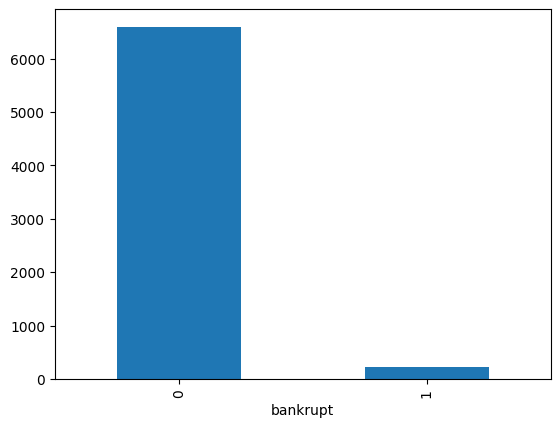

In [ ]:
po.print_classes(y)

In [ ]:
print(f"Proportion of bankrupt = 'Yes' data: {y.mean().round(2)}")

Proportion of bankrupt = 'Yes' data: 0.03
